In [1]:
import pandas as pd
import matplotlib.pyplot as mlp
from sklearn import linear_model , svm
from datetime import datetime

In [2]:
pd.options.mode.copy_on_write = True
df = pd.read_csv('wheat-data.csv')
df

,Year,hg_per_ha_yield,Rainfall_jan_april
0,1990,21211,5198.9
1,1991,22814,3948.0
2,1992,23940,2937.9
3,1993,23267,3886.7
4,1994,23796,4755.0
5,1995,25590,4516.5
6,1996,24828,3801.5
7,1997,26789,3433.6
8,1998,24852,4522.6
9,1999,25901,2361.9


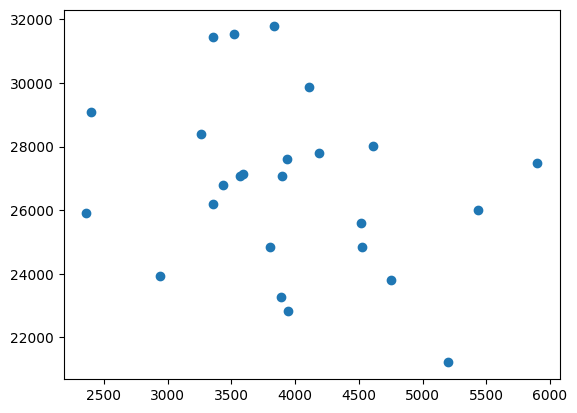

In [3]:
%matplotlib inline
mlp.scatter(df['Rainfall_jan_april'],df['hg_per_ha_yield'])

In [4]:
df2 = df[11:]
df2.head()

,Year,hg_per_ha_yield,Rainfall_jan_april
11,2001,27081,3571.6
12,2002,27621,3938.9
13,2004,27132,3591.8
14,2005,26016,5433.0
15,2006,26188,3359.5


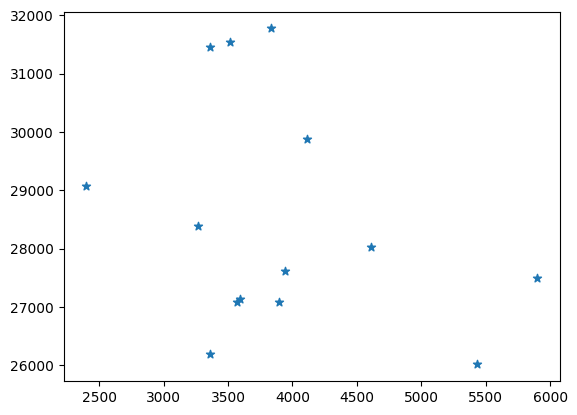

In [5]:
%matplotlib inline
mlp.scatter(df2['Rainfall_jan_april'],df2['hg_per_ha_yield'], marker='*')

# Linear Regression

## Whole data

In [6]:
model = linear_model.LinearRegression()
# test train split
df1train , df1test = df[:20] , df[20:]
#model fitting
start = datetime.now()
model.fit(df1train[['Rainfall_jan_april']], df1train.hg_per_ha_yield)
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00.021899


### Prediction

In [7]:
result = model.predict(df1test[['Rainfall_jan_april']]).round(2)
result 

array([25648.84, 25913.12, 26215.63, 26368.38, 23935.99])

In [8]:
df1test
df1test['predicted value'] = result
df1test['Accuracy'] = round(100 - abs(((df1test['predicted value'] - df1test['hg_per_ha_yield'])/df1test['hg_per_ha_yield']) * 100) , 2)

In [9]:
df1test

,Year,hg_per_ha_yield,Rainfall_jan_april,predicted value,Accuracy
20,2011,29886,4110.5,25648.84,85.82
21,2012,31775,3834.7,25913.12,81.55
22,2013,31538,3519.0,26215.63,83.12
23,2014,31454,3359.6,26368.38,83.83
24,2015,27498,5898.0,23935.99,87.05


In [10]:
print('Average accuracy', df1test['Accuracy'].mean())

Average accuracy 84.274


## Filtering down data. (We have eleminated the data before the year 2000)

In [11]:
model2 = linear_model.LinearRegression()
# test train split
df2train , df2test = df2[:10] , df2[10:]
#model fitting
start = datetime.now()
model2.fit(df2train[['Rainfall_jan_april']], df2train.hg_per_ha_yield)
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00


In [12]:
result2 = model2.predict(df2test[['Rainfall_jan_april']]).round(2)
result2

array([27639.96, 27810.71, 27896.92, 26524.03])

In [13]:
df2test
df2test['predicted value'] = result2
df2test['Accuracy'] = round(100 - abs(((df2test['predicted value'] - df2test['hg_per_ha_yield'])/df2test['hg_per_ha_yield']) * 100) , 2)

In [14]:
df2test

,Year,hg_per_ha_yield,Rainfall_jan_april,predicted value,Accuracy
21,2012,31775,3834.7,27639.96,86.99
22,2013,31538,3519.0,27810.71,88.18
23,2014,31454,3359.6,27896.92,88.69
24,2015,27498,5898.0,26524.03,96.46


In [15]:
print('Average accuracy', df2test['Accuracy'].mean())

Average accuracy 90.08


# SVM (Support Vector machine)

## Whole Data

In [16]:
#train test split
df1train2 , df1test2 = df[:20] , df[20:]
start = datetime.now()
svmModel1 = svm.SVR()
svmModel1.fit(df1train2[['Rainfall_jan_april']], df1train2.hg_per_ha_yield)
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00.007999


In [17]:
result = svmModel1.predict(df1test2[['Rainfall_jan_april']]).round(2)
result

array([26102.44, 26104.04, 26105.03, 26105.  , 26100.19])

In [18]:
df1test2['Predivtion'] = result
df1test2['Accuracy'] = round(100 - abs(((df1test2['Predivtion'] - df1test2['hg_per_ha_yield'])/df1test2['hg_per_ha_yield']) * 100) , 2)
df1test2

,Year,hg_per_ha_yield,Rainfall_jan_april,Predivtion,Accuracy
20,2011,29886,4110.5,26102.44,87.34
21,2012,31775,3834.7,26104.04,82.15
22,2013,31538,3519.0,26105.03,82.77
23,2014,31454,3359.6,26105.00,82.99
24,2015,27498,5898.0,26100.19,94.92


In [19]:
print('Average accuracy', df1test2['Accuracy'].mean())

Average accuracy 86.034


## Filtered data (From 2001)

In [20]:
predicted_value = model.predict([[2881.2]])[0]
print("Yeild in 2016:", 24000, "hg/ha")
print("Yeild predicted for 2016:", predicted_value, "hg/ha")
print("Accuracy in prediction",round(100-(abs((24000-predicted_value)/24000)*100),2), '\b%')

Yeild in 2016: 24000 hg/ha
Yeild predicted for 2016: 26826.795332798465 hg/ha
Accuracy in prediction 88.22%


C:\Users\rajat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
svmModel2 = svm.SVR()
# test train split
df2train2 , df2test2 = df2[:10] , df2[10:]
#model fitting
start = datetime.now()
svmModel2.fit(df2train2[['Rainfall_jan_april']], df2train2.hg_per_ha_yield)
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00.007466


In [22]:
print(round(model.predict([[4380]])[0],2),'hg/ha')

25390.59 hg/ha


C:\Users\rajat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
result = svmModel2.predict(df2test2[['Rainfall_jan_april']]).round(2)
result

array([27376.61, 27375.98, 27376.03, 27376.63])

In [24]:
df2test2['Prediction'] = result
df2test2['Accuracy'] = round(100 - abs(((df2test2['Prediction'] - df2test2['hg_per_ha_yield'])/df2test2['hg_per_ha_yield']) * 100) , 2)
df2test2

,Year,hg_per_ha_yield,Rainfall_jan_april,Prediction,Accuracy
21,2012,31775,3834.7,27376.61,86.16
22,2013,31538,3519.0,27375.98,86.80
23,2014,31454,3359.6,27376.03,87.04
24,2015,27498,5898.0,27376.63,99.56


In [25]:
print('Average accuracy', df2test2['Accuracy'].mean())

Average accuracy 89.89
